In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [462]:
relative_path = '~/UW/IMT_574/Week3/Homework/'

---------------

***Problem 1***

***Dataset columns***


| Types of qualities| Description | 
| --- | --- | 
|  i. num_words | number of words in the post | 
| ii. num_characters | number of characters in the post |
| iii. num_misspelled | number of misspelled words |
| iv. bin_end_qmark | if the post ends with a question mark |
| v. num_interrogative | number of interrogative words in the post |
| vi. bin_start_small | if the answer starts with a lowercase letter ("1" means yes, otherwise no) |
| vii. num_sentences | number of sentences per post |
| viii. num_punctuations | number of punctuation symbols in the post |
| ix. label: the label of the post | ("G" for good and "B" for bad) as determined by the tool |

In [463]:
df = pd.read_csv(relative_path + 'Problem 1—quality.csv')
df.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B


***1) Create a logistics regression model to predict the class label from the first eight attributes of the question set.***

In [464]:
def calculate_accuracy(prediction, y_test):
    '''Accuracy using statsmodels accuracy score'''
    pred = prediction >= 0.5
    acc = accuracy_score(y_test, pred)*100
    return acc

In [465]:
def manually_calculate_accuracy(prediction, data_for_model, predictor):
    '''Accuracy calculated manually'''
    acc = 1-(np.sum(np.abs(prediction - predictor))) / len(data_for_model)
    return acc

In [466]:
def train_model(X, y, size):
    #Dividing data in 30% test and 70% training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=11) 
    logreg_model = sm.Logit(y_train, X_train)
    model= logreg_model.fit() 
    return model, X_test, y_test 

In [467]:
#Adding binary outcome variable
df['binary_label'] = df.label == 'G'

In [468]:
#Adding constant
df['constant'] = 1

In [469]:
#Dropping unnecessary columns
data_for_logreg_model = df.drop(columns =['S.No.']).copy()
data_for_logreg_model.head()

,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label,binary_label,constant
0,10,48,2,0,0,0,2,4,B,False,1
1,8,25,0,0,0,1,1,0,B,False,1
2,20,81,0,1,19,0,1,1,B,False,1
3,9,34,1,0,1,0,1,2,B,False,1
4,18,69,3,0,1,0,1,0,B,False,1


In [470]:
data_for_logreg_model.isna().any()

num_words            False
num_characters       False
num_misspelled       False
bin_end_qmark        False
num_interrogative    False
bin_start_small      False
num_sentences        False
num_punctuations     False
label                False
binary_label         False
constant             False
dtype: bool

In [471]:
data_for_logreg_model.head()

,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label,binary_label,constant
0,10,48,2,0,0,0,2,4,B,False,1
1,8,25,0,0,0,1,1,0,B,False,1
2,20,81,0,1,19,0,1,1,B,False,1
3,9,34,1,0,1,0,1,2,B,False,1
4,18,69,3,0,1,0,1,0,B,False,1


In [472]:
#Using statsmodel logreg libraries
#Logit(Y, X)
X = data_for_logreg_model.drop(['binary_label', 'label'], axis = 1)
y = data_for_logreg_model.binary_label


In [473]:
model_a, X_test_a, y_test_a = train_model(X, y, 0.3)

Optimization terminated successfully.
         Current function value: 0.322765
         Iterations 9


In [474]:
pred = model_a.predict(X_test_a)

In [475]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           binary_label   No. Observations:                   19
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.5258
Time:                        14:22:56   Log-Likelihood:                -6.1325
converged:                       True   LL-Null:                       -12.932
Covariance Type:            nonrobust   LLR p-value:                   0.09284
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
num_words             0.0670      0.307      0.218      0.827      -0.534       0.668
num_characters        0.0235      0.074      0.316      0.752      -0.122       0.169
num_misspelled       -1.3940      0.723     -1.927      0.054      -2.812       0.024
bin_end_qmark        -4.5200      3.779     -1.196      0.232     -11.927       2.887
num_interrogative    -0.0675      0.290     -0.233      0.816      -0.635       0.500
bin_start_small       0.0120      2.179      0.005      0.996      -4.259       4.283
num_sentences         2.7017      2.506      1.078      0.281      -2.209       7.612
num_punctuations     -0.7377      0.608     -1.214      0.225      -1.929       0.454
constant             -2.1814      2.221     -0.982      0.326      -6.534       2.171
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [476]:
acc_1 = manually_calculate_accuracy(pred, data_for_logreg_model, data_for_logreg_model.binary_label)
print('Accuracy:', acc_1)

Accuracy: 0.9478700479829015


***2) Try doing the same using two different subsets (your choice) of those eight attributes.***

- a)

In [477]:
#Using only num_misspelled as predictor
data_for_logreg_model_b = df.loc[:, ['binary_label', 'num_misspelled', 'constant']].copy()
data_for_logreg_model_b.head()

,binary_label,num_misspelled,constant
0,False,2,1
1,False,0,1
2,False,0,1
3,False,1,1
4,False,3,1


In [478]:
#Logit(Y, X)
X_b = data_for_logreg_model_b.drop(['binary_label'], axis = 1)
y_b = data_for_logreg_model_b.binary_label

In [479]:
model_b, X_test_b, y_test_b = train_model(X_b, y_b, 0.3)

Optimization terminated successfully.
         Current function value: 0.678109
         Iterations 4


In [480]:
pred_b = model_b.predict(X_test_b)

In [481]:
acc_2 = manually_calculate_accuracy(pred_b, data_for_logreg_model_b, data_for_logreg_model_b.binary_label)
print('Accuracy:', acc_2)

Accuracy: 0.8263564804868696


In [482]:
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           binary_label   No. Observations:                   19
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                0.003703
Time:                        14:22:56   Log-Likelihood:                -12.884
converged:                       True   LL-Null:                       -12.932
Covariance Type:            nonrobust   LLR p-value:                    0.7570
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
num_misspelled     0.0387      0.128      0.302      0.763      -0.213       0.290
constant           0.2312      0.543      0.426      0.670      -0.833       1.296
==================================================================================
"""

- b)

In [483]:
#Using only bin_end_qmark, num_interrogative  as predictors
data_for_logreg_model_c = df.loc[:, ['binary_label', 'bin_end_qmark', 'num_sentences', 'constant']].copy()
data_for_logreg_model_c.head()

,binary_label,bin_end_qmark,num_sentences,constant
0,False,0,2,1
1,False,0,1,1
2,False,1,1,1
3,False,0,1,1
4,False,0,1,1


In [484]:
#Logit(Y, X)
X_c = data_for_logreg_model_c.drop(['binary_label'], axis = 1)
y_c = data_for_logreg_model_c.binary_label

In [485]:
model_c, X_test_c, y_test_c = train_model(X_c, y_c, 0.3)

Optimization terminated successfully.
         Current function value: 0.602567
         Iterations 7


In [486]:
pred_c= model_c.predict(X_test_c)

In [487]:
acc_3 = manually_calculate_accuracy(pred_c, data_for_logreg_model_c, data_for_logreg_model_c.binary_label)
print('Accuracy:', acc_3)

Accuracy: 0.8596394367041862


In [488]:
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           binary_label   No. Observations:                   19
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.1147
Time:                        14:22:56   Log-Likelihood:                -11.449
converged:                       True   LL-Null:                       -12.932
Covariance Type:            nonrobust   LLR p-value:                    0.2269
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bin_end_qmark    -0.9429      1.348     -0.700      0.484      -3.584       1.699
num_sentences     0.4395      0.490      0.897      0.370      -0.520       1.400
constant         -0.3431      0.919     -0.373      0.709      -2.144       1.458
=================================================================================
"""

***3) Report the accuracies of each of these three models.***

- For first model

In [489]:
acc_1  =calculate_accuracy(pred, y_test_a)
print('Accuracy score first model:', acc_1,'%')

Accuracy score first model: 88.88888888888889 %


- For 2nd model

In [490]:
acc_2  =calculate_accuracy(pred_b, y_test_b)
print('Accuracy score first model:', acc_2,'%')

Accuracy score first model: 33.33333333333333 %


- For 3rd model

In [491]:
acc_3  =calculate_accuracy(pred_c, y_test_c)
print('Accuracy score first model:', acc_3,'%')

Accuracy score first model: 44.44444444444444 %


***4) For the two subsets that you use, provide some justification (why you chose those features in a given subset).***

- For the second model, I chose the number of mispelled words, since I would consider mispells in a post as a good indicator of if the post is good or bad, such as spam, or post generated by bots
- For the third model, I believe the appearance of interrogative words, or posts ending with a ? mark, indicate that the person posting the answer might not have a clear idea or enough knowledge regarding the topic discussed in the forum.

---------------

***Problem 2***

In [492]:
df = pd.read_csv(relative_path + 'Problem 2—wine dataset.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


***1) Download the wine dataset. Download wine dataset. It contains information about several wines—their characteristics (features) and if it's considered high quality or not (1 or 0).***

In [493]:
data_for_model_wine = df.copy()
#Converting outcome var from decimal to integer
data_for_model_wine['high_quality'] = data_for_model_wine['high_quality'].astype(int)
data_for_model_wine['is_red'] = data_for_model_wine['is_red'].astype(int)
data_for_model_wine = data_for_model_wine.drop(['color'], axis = 1)
data_for_model_wine['constant'] = 1
# df_unique = data_for_model_wine.groupby('high_quality')
# df_unique.nunique()
# df_unique = data_for_model_wine.groupby('color')
# df_unique.nunique()
# df_unique = data_for_model_wine.groupby(['high_quality','quality'])
# df_unique.nunique()

In [494]:
#Dropping quality column, since it is visibly correlated with the outcome variable (high_quality = 1 when quality in (3-6))
# (no high quality when quality in (7-9))
data_for_model_wine = data_for_model_wine.drop(['quality'], axis = 1)

In [495]:
data_for_model_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,is_red,high_quality,constant
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0,1


In [496]:
#Checking if there are missing values that need to be imputed
data_for_model_wine.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
is_red                  False
high_quality            False
constant                False
dtype: bool

***2) First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.***

In [497]:
#Using logit and backward selection to choose best predictors:

#Logit(Y, X)
X_wine = data_for_model_wine.drop(['high_quality','is_red'], axis=1)   
y_wine = data_for_model_wine.high_quality

In [498]:
model_logit__wine, X_test_wine, y_test_wine = train_model(X_wine, y_wine, 0.3)

Optimization terminated successfully.
         Current function value: 0.398746
         Iterations 9


In [499]:
model_logit__wine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           high_quality   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4535
Method:                           MLE   Df Model:                           11
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.2039
Time:                        14:22:57   Log-Likelihood:                -1813.1
converged:                       True   LL-Null:                       -2277.5
Covariance Type:            nonrobust   LLR p-value:                3.788e-192
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.4331      0.076      5.703      0.000       0.284       0.582
volatile_acidity        -3.3805      0.448     -7.545      0.000      -4.259      -2.502
citric_acid             -0.2547      0.397     -0.641      0.522      -1.034       0.524
residual_sugar           0.1672      0.026      6.367      0.000       0.116       0.219
chlorides               -6.5443      2.746     -2.383      0.017     -11.927      -1.161
free_sulfur_dioxide      0.0110      0.003      3.326      0.001       0.005       0.018
total_sulfur_dioxide    -0.0052      0.001     -3.881      0.000      -0.008      -0.003
density               -307.9376     64.289     -4.790      0.000    -433.942    -181.933
pH                       2.5994      0.418      6.212      0.000       1.779       3.420
sulphates                2.4370      0.341      7.154      0.000       1.769       3.105
alcohol                  0.5426      0.083      6.515      0.000       0.379       0.706
constant               286.9111     63.041      4.551      0.000     163.352     410.470
========================================================================================
"""

****The lowest coefficients are free_sulfur_dioxide, total_sulfur_dioxide, so it appears these are the least significant predictors for the outcome variable***

***3) Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2–10.***

In [500]:
data_for_model_wine_reduced = data_for_model_wine.drop(['is_red', 'free_sulfur_dioxide', 'total_sulfur_dioxide'], axis=1).copy()

In [501]:
#New dataset with minimal predictors after trial & error stage
X_wine = data_for_model_wine_reduced.drop(['high_quality'], axis=1)
y_wine = data_for_model_wine_reduced.high_quality

In [502]:
#Dividing data in 30% test and 70% training
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=11) 

In [503]:
def calculate_knn(X_train, y_train,k):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    return knn_model

In [504]:
def plotter(accuracies):

    accuracy_list = sorted(accuracies.items())
    x, y = zip(*accuracy_list) 
    
    plt.xlabel("Number of K Neighbors")
    plt.ylabel("Accuracy")
    plt.plot(x, y, color='red')
    plt.show()  

In [505]:
accuracy_dict=dict()

for n in range(2,10+1):
    knn_model_wine = calculate_knn(X_train_wine, y_train_wine, n)
    
    pred = knn_model_wine.predict(X_test_wine)

    acc_knn = calculate_accuracy(pred, y_test_wine)

    print('Accuracy for K=', n, ':', acc_knn)

    accuracy_dict[n]= acc_knn



Accuracy for K= 2 : 83.6923076923077
Accuracy for K= 3 : 81.53846153846153
Accuracy for K= 4 : 83.02564102564102
Accuracy for K= 5 : 81.7948717948718
Accuracy for K= 6 : 82.25641025641026
Accuracy for K= 7 : 81.43589743589743
Accuracy for K= 8 : 82.0
Accuracy for K= 9 : 82.3076923076923
Accuracy for K= 10 : 81.64102564102565


***4) Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis.***

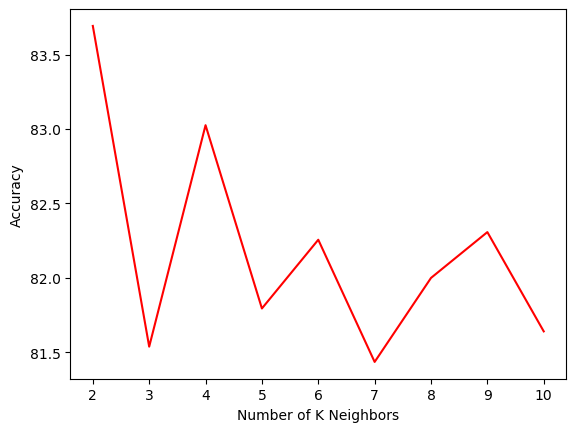

In [506]:
plotter(accuracy_dict)